# Link for the Dataset 
#### https://www.start.umd.edu/gtd/

In [1]:
import pandas as pd 
import sklearn as sns 
import matplotlib.pyplot as plt 


In [9]:
terror=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_8748\1595570913.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror=pd.read_csv("C://Users//Deep.ai//Downloads//archive (1)//globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')


In [10]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [22]:
print("Number of rows are",terror.shape[0])
print("Number of rows are",terror.shape[1])

Number of rows are 181691
Number of rows are 135


In [7]:
terror['region']

0          2
1          1
2          5
3          8
4          4
          ..
181686    11
181687    10
181688     5
181689     6
181690     5
Name: region, Length: 181691, dtype: int64

In [5]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

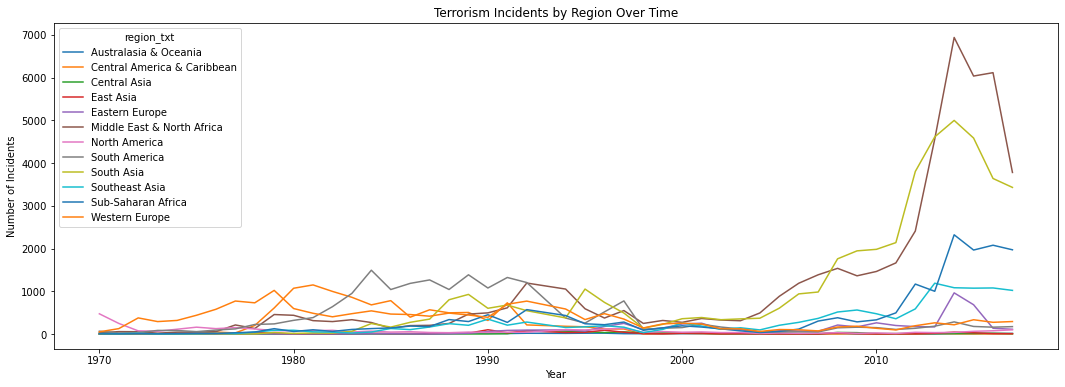

In [13]:


def create_crosstab(df, x_col, y_col):
    """
    Create a crosstab of the specified x and y columns from the input dataframe.
    
    Args:
        df (pandas.DataFrame): Input dataframe.
        x_col (str): Columns for X axis.
        y_col (str): Columns for Y axis.
    
    Returns:
        pandas.DataFrame: Crosstab of the specified x and y columns.
    """
    return pd.crosstab(df[x_col], df[y_col])

def plot_line_chart(df, x_label, y_label, title):
    """
    Line chart Plot.
    
    Args:
        df (pandas.DataFrame): Input dataframe.
        x_label (str):  x-axis.
        y_label (str): y-axis.
        title  : Plot Title.
    """
    ax = df.plot(figsize=(18, 6))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()


# Create the crosstab of year and region
terror_region = create_crosstab(terror, 'iyear', 'region_txt')

# Plot the line chart of the crosstab
plot_line_chart(terror_region, 'Year', 'Number of Incidents', 'Terrorism Incidents by Region Over Time')


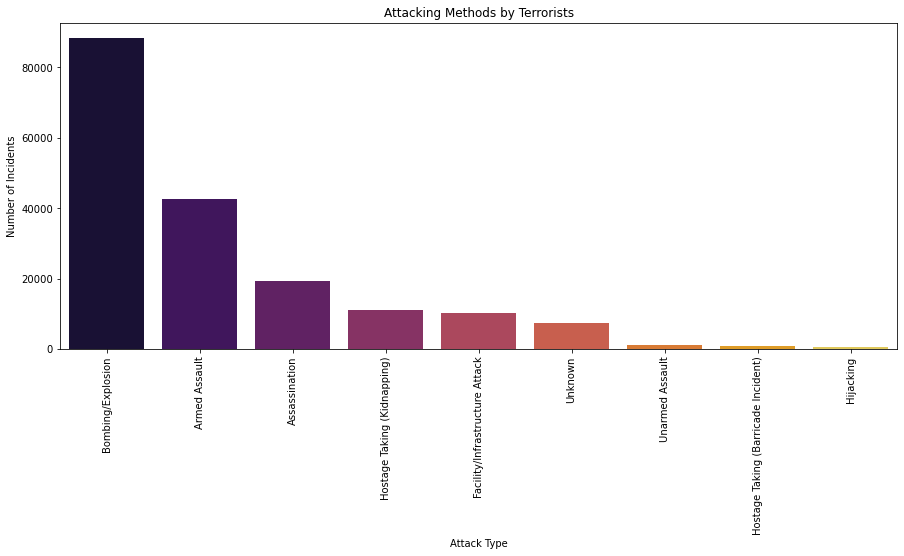

In [17]:

def plot_countplot(df, x_col, palette, order, x_rot, title, x_label, y_label):
    """
    Create a countplot of the input dataframe.
    
    Args:
        df (pandas.DataFrame): Input dataframe.
        x_col (str): Name of the column to use as the x-axis.
        palette (str or dict): Color palette to use for the plot.
        order (list): Order in which to sort the x-axis categories.
        x_rot (int): Rotation angle for the x-axis tick labels.
        title (str): Plot Title.
        x_label (str): X-axis.
        y_label (str): Y-axis.
    """
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.countplot(x=x_col, data=df, palette=palette, order=order, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rot)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()


# Plot the countplot of attack types
plot_countplot(df=terror,
               x_col='attacktype1_txt',
               palette='inferno',
               order=terror['attacktype1_txt'].value_counts().index,
               x_rot=90,
               title='Attacking Methods by Terrorists',
               x_label='Attack Type',
               y_label='Number of Incidents')


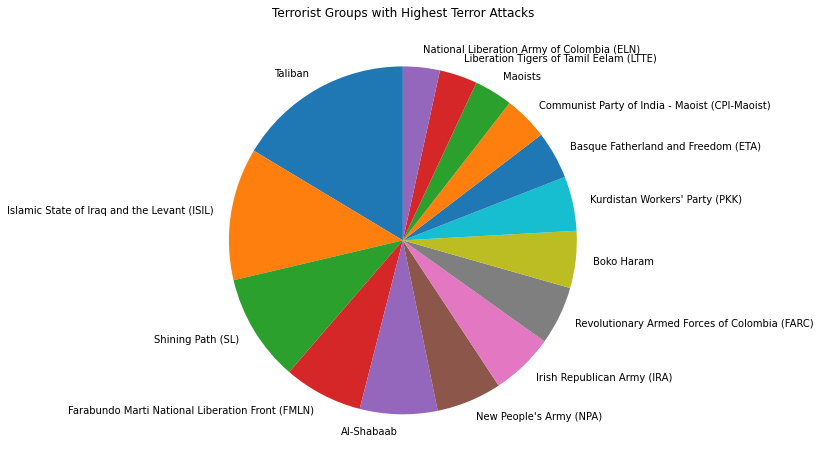

In [21]:

def plot_piechart(df, x_col, n_categories, title):
    """
    Create a pie chart of the input dataframe.
    
    Args:
        df (pandas.DataFrame): Input dataframe.
        x_col (str): Name of the column to use as the x-axis.
        n_categories (int): Number of top categories to include in the pie chart.
        palette (str or dict): Color palette to use for the plot.
        title (str): Title for the plot.
    """
    # Get the top n_categories and their counts
    top_categories = df[x_col].value_counts()[1:n_categories+1]
    
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pie(top_categories.values, labels=top_categories.index,startangle=90)
    ax.set_title(title)
    plt.show()


# Plot the pie chart of terrorist groups with the most attacks
plot_piechart(df=terror,
              x_col='gname',
              n_categories=15,
              title='Terrorist Groups with Highest Terror Attacks')
